# Solutions to Complex Systems Lab

In [1]:
# import libraries
# Always run this cell first!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import powerlaw
from scipy import integrate
from scipy.integrate import odeint
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import scipy
import statsmodels.api # appear to need to import the api as well as the library itself for the interpreter to find the modules
import statsmodels as sm
from matplotlib import ticker
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline
plotly.offline.init_notebook_mode(connected=True) # make plotly work with Jupyter Notebook using CDN
from scipy.stats import linregress
import folium
from folium.plugins import MarkerCluster

# an extra function for plotting a straight line
def plot_abline(slope, intercept, color = None, x_name = "x", y_name = "y"):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(
        x_vals, y_vals, '--', color = color,
        label = f"${y_name} = {slope:.2f}{x_name} " + ("-" if intercept < 0 else "+") + f"{abs(intercept):.2f}$"
    )

## Fundamental Concepts

Solution to Problem 1

In [2]:
def rmpp(x0,y0,K):
    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as npy
    import random

    # timestep determines the accuracy of the euler method of integration
    timestep = 0.001
    # amplitude of noise term
    amp = 0.
    # the time at which the simulation ends
    end_time = 500

    # creates a time vector from 0 to end_time, seperated by a timestep
    t = npy.arange(0,end_time,timestep)

    # intialize rabbits (x) and foxes (y) vectors
    x = []
    y = []

    """" parameters"""

    r = .5
    a=5
    h=3
    e=.5
    m=.1

    """ euler integration """

    # initial conditions for the rabbit (x) and fox (y) populations at time=0
    x0=x0
    y0=y0
    x.append(x0)
    y.append(y0) 

    # forward euler method of integration
    # a perturbbation term is added to the differentials to make the simulation stochastic
    for index in range(1,len(t)):

        # evaluate the current differentials
        xd = r*x[index-1]*(1-x[index-1]/K) - a * x[index-1]*y[index-1]/(1+a*h*x[index-1])
        yd = e*a*x[index-1]*y[index-1]/(1+a*h*x[index-1])-m*y[index-1]

        # evaluate the next value of x and y using differentials
        next_x = x[index-1] + xd * timestep
        next_y = y[index-1] + yd * timestep

        x.append(next_x)
        y.append(next_y)

    """ visualization """

    if amp == 0:    
        # visualization of deterministic populations against time
        plt.figure(figsize=(2,1))
        plt.plot(x, y)
        plt.xlim=[0,.25]
        plt.ylim=[0,.25]
        plt.ylabel('Predator Density')
        plt.xlabel('Prey Density')
        plt.text(x0,y0,'o',ha='center', va='center',color='r')
        plt.text(x0,y0,' Initial Point',ha='left', va='center',color='r')
        plt.title('Predator-Prey K='+str(K))
        plt.savefig("K.png")
        plt.show()
    return

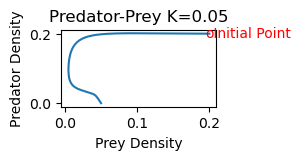

In [3]:
# Probkem 1b
rmpp(.2,.2,.05)

Solution to Problem 2a)

<img src="2a.png" alt="Drawing" style="width: 500px;"/>

2b) As K increases, the equilibrium point shifts stability from one with zero predator concentration to one with positive predator concentration. Increasing K further, the equilibrium is still stable, but the solution spirals around the equilibrium point on its approach toward the equilibrium values. The steady state is hence also referred to as a stable spiral. Finally, as K increases still further,the equilirium loses its stability and solutions approach a stable limit cycle (periodic solution) surrounding the equilibrium point.

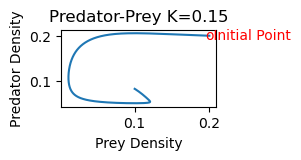

In [4]:
rmpp(.2,.2,.15)

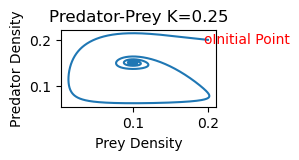

In [5]:
rmpp(.2,.2,.25)

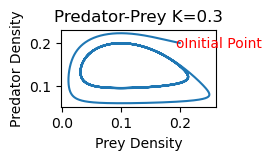

In [6]:
rmpp(.2,.2,.3)

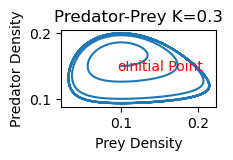

In [7]:
rmpp(.1,.15,.3)

Solution to Problem 3 

The transition of the steady state with positive densities of both prey and predator from stable to unstable occurs in what is called a Hopf bifurcation point. As explained in the previous section at larger values of K the prey-predator equilibrium loses its stability while at the same time a limit cycle emerges, that is a closed loop of prey and predator densities which all timeseries of dynamics of the model tend to approach.For more information on this: https://staff.fnwi.uva.nl/a.m.deroos/projects/QuantitativeBiology/43-HopfPoint-Rosenzweig.html

#### 2. Sensitive Dependence on Initial Conditions in a Fitzhugh Nagumo System


Solution to problem 1

The FHN bursting behavior is related to Hopf bifurcation in the 2D system. The interval quiescense (burst pattern 00000) occurs at a subcritical parameter values where the equilibrium is a stable spiral. The two large spikes(11) occur for parameter values across the Hopf bifurcation point due to a stable periodic solution in the underlying 2D system


 

Solution to Problem 2

a) After plugging in  x0=[1.725,.337,.00764] for the initial condition,  the burst pattern changes to 11000101000000



b) Sensitive dependence occurs in non-linear systems where the initial conditions have a large impact on the solution behavior. For the the FHN system, changing the initial condition only slightly $[1.744,.298,.00872]\rightarrow [1.725,.337,.00764]$ results in a completely different stable burst pattern.

Solution to problem 1

a)

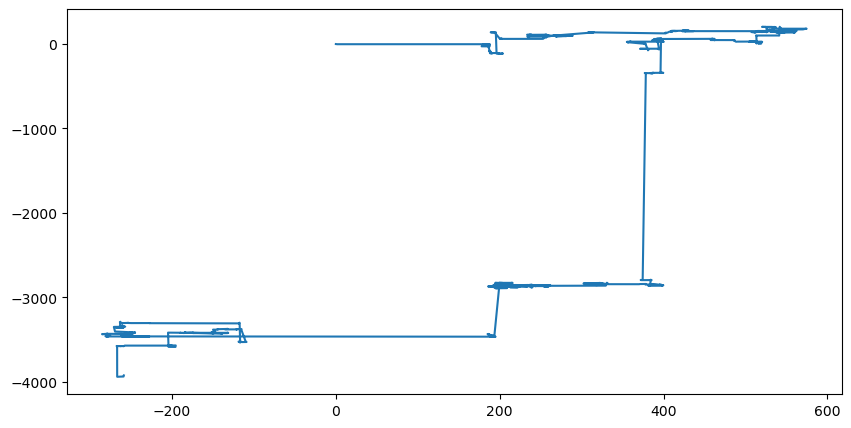

In [8]:
# Set seed for reproducible results (optional)
np.random.seed(10)

# Initial particle position
current_xpos = 0
current_ypos = 0

# Initial list of positions
x = [current_xpos]
y = [current_ypos]

# Define number of particle steps
N = 1000

# Generate set of random steps in advance (it could also be done inside the for loop

xstep=np.random.standard_cauchy(N)
ystep=np.random.standard_cauchy(N)

# Iterate and track the particle over each step
for i in range(N):
    
    # Update position
    current_xpos += xstep[i]
    current_ypos += ystep[i]
    
    # Append new position
    x.append(current_xpos)
    y.append(current_ypos)
    
# Plot random walk
plt.figure(figsize=(10,5))
plt.plot(x, y)

plt.show()    

b) Unlike Brownian motion, a Cauchy distribution has long "flights."

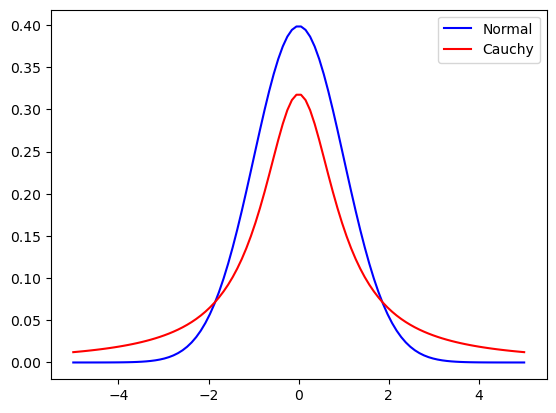

In [9]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color='b')
plt.plot(x, stats.cauchy.pdf(x, mu, sigma),color='red')
plt.legend(["Normal","Cauchy"])
plt.show()

2. a) Unlike a normal distribution with standard deviation s.d.=1, the Cauchy distribution (in red) wih a heavy tail has a significant probability for random draws more than 3 or less than -3. That is what causes the long flights in 1a).

b) In some contexts, long flights are catastrophic events (eg. stock market crash).

## Scale Adjusted Metropolitan Index

Solution to Exercise

Text(0.5, 1.0, 'SAMI with Hong Kong')

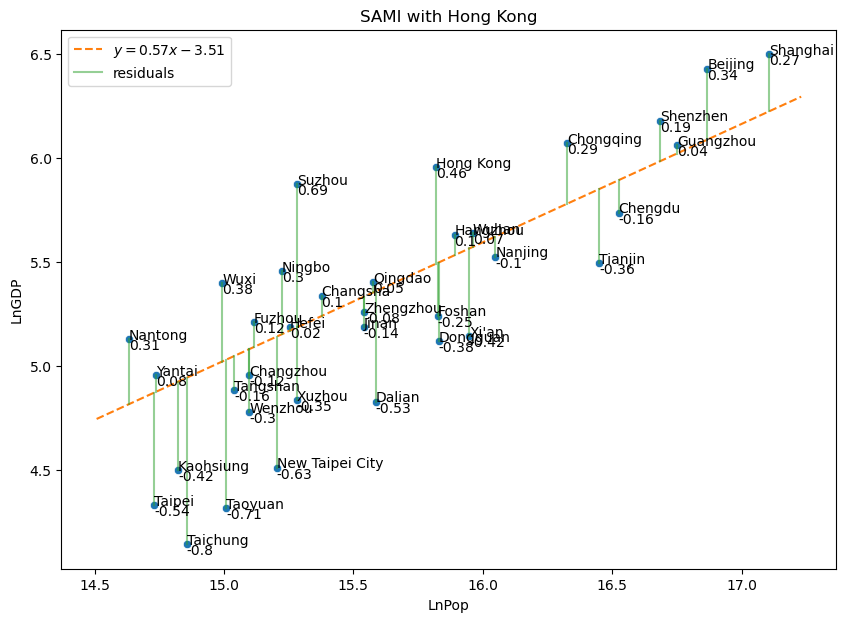

In [10]:
chinagdp = pd.read_excel('ChinaGDPwHongKong.xlsx')
for i in chinagdp.index:
    chinagdp.loc[i,"LnPop"]=np.log( chinagdp.loc[i,"Pop"])
    chinagdp.loc[i,"LnGDP"]=np.log( chinagdp.loc[i,"GDP"])
fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize = (10,7))
slopes = [.5689]
intercepts = [-3.5082]
(scattercolor, trendcolor, residcolor) = sns.color_palette()[0:3]
# plot data
sns.scatterplot(
    data = chinagdp,
    x = 'LnPop',
    y = 'LnGDP',
    color = scattercolor,
    )
# plot the line with given slope and intercept
plot_abline(slopes[0], intercepts[0], color = trendcolor)
# plot residuals
for j, (x, y) in enumerate(zip(chinagdp['LnPop'], chinagdp['LnGDP'])):
    plt.plot(
        [x, x], [y, slopes[0]*x + intercepts[0]],
        color = residcolor, alpha = 0.5,
        label = "residuals" if j == 0 else "" # show legend entry only for first residual in each plot
    )
for j, (x, y) in enumerate(zip(chinagdp['LnPop'], chinagdp['LnGDP'])):
    plt.text(x,y,chinagdp.loc[j,"City"])
    plt.text(x,y-.05,str(np.round(y-(slopes[0]*x + intercepts[0]),2)))
plt.legend(loc = "upper left")
plt.savefig("ChinaSAMI.png")
plt.gca().set_title("SAMI with Hong Kong")

## 5. IDP

This is an example solution by Aidan Kingsbury.

1. Read in IDP data from the file "idp.xlsx"

In [11]:
#original filename = 'dtm-ethiopia-tigray-region-site-assessment-round-33-april-june-2023.xlsx'
filename="IDP.xlsx"
df = pd.read_excel(filename)
#import the data
df.head(1)

,1.1.a.1: Survey Date,1.1.c.1: Site ID,1.1.d.1: Site Name,1.4.a.2: Is site open?,1.1.e.2: Zone,Zone Code,1.1.e.3: Woreda,1.1.e.4: Kebele,1.1.f.1: GPS: Longitude,1.1.f.2: GPS: Latitude,...,S1723: Other internet sources (e.g. apps),S1723: Please specify which other internet sources,S1723: Other,"S1723: If other source of news/information, please specify",S1784: Is mobile network access available in the site?,S1495: What % of HHs own a mobile phone?,11.3.a.1: Are members of the community discussing/advertising travel opportunities?,"11.3.a.6: If Yes, to where?",11.3.a.2: Specify all locations,M1712: Additional Comments / Observations
0,#date+occurred,NaN,NaN,NaN,#adm2+name,#adm2+code,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Select columns to assess education disorder.

In [12]:
#Pre-primary, secondary, resources,
#quality/satisfaction, girl attendance, boy attendance, teachers
columns_to_keep = ['1.1.c.1: Site ID',
                   '1.1.d.1: Site Name',
                   '1.1.f.1: GPS: Longitude',
                   '1.1.f.2: GPS: Latitude',
                   'S1518: Is there access to pre-primary (formal or temporary) schools for children from displaced HHs?',
                   'S1536: Access to secondary (formal or temporary) schools for children from displaced HHs?',
                   'S1226: Other, Specify',
                   'S1613: Poor educational standard',
                   'S1613: Why are some girls not attending school?',
                   'S1614: Why are some boys not attending school?',
                   'Are there enough teachers to school children?']
data = df[columns_to_keep]
new_column_names = ['ID', 'Name','Long','Lat','Pre-primary','Secondary','Resources','Quality','Girl_Attendence','Boy_Attendence','Teachers']
data.columns = new_column_names
data=data.dropna()
data.head(1)

,ID,Name,Long,Lat,Pre-primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers
1,TG1039,Hareze Seb'ata,39.5828,14.43946,No,No,Education is not yet started,No,Other,Other,Unknown


3. Map IDP camps (optional)

In [13]:

# Assuming 'data' is your DataFrame with 'Lat' and 'Long' columns

# Create a folium map centered around the mean of latitudes and longitudes
map_center = [data['Lat'].mean(), data['Long'].mean()]
my_map = folium.Map(location=map_center, zoom_start=12)

# Create a MarkerCluster layer for better visualization of markers
marker_cluster = MarkerCluster().add_to(my_map)

# Add markers for each row in the DataFrame
for index, row in data.iterrows():
    folium.Marker([row['Lat'], row['Long']], popup=row['Name']).add_to(marker_cluster)

# Save the map as an HTML file or display it
my_map.save("my_map.html")
# or
my_map


4. Determine camps near Mekelle and Shire.

In [14]:
#Mekele = 13.4963° N, 39.4743°
#Shire = 14.1016° N, 38.2836° 
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two sets of latitude and longitude coordinates.
    """
    R = 3959.87433  # radius of the Earth in miles
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Assuming 'data' is your DataFrame with 'Lat' and 'Long' columns
Mekele_coords = (13.4963, 39.4743)  # Replace with the coordinates of the first city
Shire_coords = (14.1016, 38.2836)  # Replace with the coordinates of the second city

# Function to determine the closest city based on Haversine distance
def closest_city(row):
    distance_to_Mekele = haversine(row['Lat'], row['Long'], *Mekele_coords)
    distance_to_Shire = haversine(row['Lat'], row['Long'], *Shire_coords)
    
    if distance_to_Mekele < 15 and distance_to_Mekele <= distance_to_Shire:
        return 'Mekele'
    elif distance_to_Shire < 15:
        return 'Shire'
    else:
        return 'Other'

# Add 'City' column to the DataFrame
data['City'] = data.apply(closest_city, axis=1)
data.head(1)

,ID,Name,Long,Lat,Pre-primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers,City
1,TG1039,Hareze Seb'ata,39.5828,14.43946,No,No,Education is not yet started,No,Other,Other,Unknown,Other


5. Binary code education needs

In [15]:
#Pre-primary: No = 0, Yes = 1
#Secondary: No = 0, Yes = 1
#Resources: 'Lack of scholastic material'=0, else 1
#Quality: No=0, Yes = 1
#Girl_Attendence: 'They are attending' = 1, else = 0
#Boy_Attendence: 'They are attending' = 1, else = 0
#Teachers: 'Yes' = 1, else = 0

# Assuming 'data' is your DataFrame with qualitative columns

# Define mapping functions for each column
def map_pre_primary(value):
    return 1 if 'Yes' in value else 0

def map_secondary(value):
    return 1 if 'Yes' in value else 0

def map_resources(value):
    return 0 if 'Lack of scholastic material' in value else 1

def map_quality(value):
    return 1 if 'Yes' in value else 0

def map_girl_attendance(value):
    return 1 if 'They are attending' in value else 0

def map_boy_attendance(value):
    return 1 if 'They are attending' in value else 0

def map_teachers(value):
    return 1 if 'Yes' in value else 0

# Apply the mapping functions to each column
data['Pre-primary'] = data['Pre-primary'].apply(map_pre_primary)
data['Secondary'] = data['Secondary'].apply(map_secondary)
data['Resources'] = data['Resources'].apply(map_resources)
data['Quality'] = data['Quality'].apply(map_quality)
data['Girl_Attendence'] = data['Girl_Attendence'].apply(map_girl_attendance)
data['Boy_Attendence'] = data['Boy_Attendence'].apply(map_boy_attendance)
data['Teachers'] = data['Teachers'].apply(map_teachers)

# Display the updated DataFrame
data.head()



,ID,Name,Long,Lat,Pre-primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers,City
1,TG1039,Hareze Seb'ata,39.58280,14.43946,0,0,1,0,0,0,0,Other
2,TG1040,Enda Mosa,39.55493,14.42384,0,0,1,0,0,0,0,Other
3,TG729,Adi Abagie,38.18660,14.26590,0,0,1,0,0,0,0,Shire
4,TG732,May Ambssa,38.23350,14.22740,0,0,1,0,0,0,0,Shire
5,TG731,Hibret,38.16930,14.32020,0,0,1,0,0,0,0,Other


6. Separate data for Mekelle and for Shire.

In [16]:
# Filter rows with 'Mekele' in the 'City' column
mekele_df = data[data['City'] == 'Mekele']

# Filter rows with 'Shire' in the 'City' column
shire_df = data[data['City'] == 'Shire']

In [17]:
mekele_df.head(2)

,ID,Name,Long,Lat,Pre-primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers,City
468,TG624,Felege Mayat,39.4715,13.6018,1,0,0,0,1,1,0,Mekele
469,TG765,Amanit,39.2707,13.5746,1,0,0,0,0,1,0,Mekele


In [18]:
shire_df.head(2)

,ID,Name,Long,Lat,Pre-primary,Secondary,Resources,Quality,Girl_Attendence,Boy_Attendence,Teachers,City
3,TG729,Adi Abagie,38.1866,14.2659,0,0,1,0,0,0,0,Shire
4,TG732,May Ambssa,38.2335,14.2274,0,0,1,0,0,0,0,Shire


6. Compute entropy for IDP education data for Mekelle and Shire

In [19]:
import pandas as pd
import numpy as np

def calculate_entropy(df):
    entropy = 0
    total_rows = len(df)

    # Calculate the probability of each need
    for column in ['Pre-primary', 'Secondary', 'Resources', 'Quality', 'Girl_Attendence', 'Boy_Attendence', 'Teachers']:
        # Count the occurrences of 1 and 0 in the column
        count_1 = df[column].sum()
        count_0 = total_rows - count_1

        # Calculate the probability
        p_1 = count_1 / total_rows
        p_0 = count_0 / total_rows

        # Avoid log(0) by adding a small value (epsilon)
        epsilon = 1e-10

        # Update the entropy using the entropy formula
        entropy -= (p_1 * np.log2(p_1 + epsilon) + p_0 * np.log2(p_0 + epsilon))

    return entropy

# Calculate entropy for 'Mekele' DataFrame
entropy_mekele = calculate_entropy(mekele_df)
print(f"Entropy for Mekele: {entropy_mekele}")

# Calculate entropy for 'Shire' DataFrame
entropy_shire = calculate_entropy(shire_df)
print(f"Entropy for Shire: {entropy_shire}")


Entropy for Mekele: 2.8169492612898535
Entropy for Shire: 2.1418191760456615
